In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from subprocess import call

In [3]:
# loading dataset
main_data = datasets.load_iris()

In [5]:
# printing the names
print("Features:", main_data.feature_names, sep="\n")

# printing the label type of wine(class_0, class_1, class_2)
print("\nLabels:", main_data.target_names)

# print data(feature)shape
print("Features in the dataset are:", main_data.data.shape)

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Labels: ['setosa' 'versicolor' 'virginica']
Features in the dataset are: (150, 4)


In [16]:
#split data set into train and test sets
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(main_data.data, main_data.target, test_size = 0.3, random_state = 75)

In [ ]:
x_train

array([[5.4, 3.4, 1.5, 0.4],
       [6.2, 2.8, 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 2.5, 5.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [5.5, 2.3, 4. , 1.3],
       [5.8, 2.6, 4. , 1.2],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.7, 2.8, 6.7, 2. ],
       [4.7, 3.2, 1.6, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [4.6, 3.6, 1. , 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [4.4, 3. , 1.3, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [6.2, 3.4, 5.4, 2.3],
       [6.8, 3.2, 5.9, 2.3],
       [6. , 3. , 4.8, 1.8],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 3. , 4.2, 1.2],
       [6.7, 3.1, 5.6, 2.4],
       [4.9, 3.6, 1.4, 0.1],
       [7.2, 3.2, 6. , 1.8],
       [6.1, 2.6, 5.6, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3.1, 4.4, 1.4],
       [6.2, 2.2, 4.5, 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [5.5, 2

In [17]:
y_test

array([2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2,
       1])

In [18]:
#Create a Decision Tree Classifier (using Gini)
dtc = DecisionTreeClassifier(criterion = "gini")

#Train the model using the training sets
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
# Predict the classes of test data
pred = dtc.predict(x_test)
print("Prediction:",pred)

Prediction: [2 2 1 1 1 0 0 1 0 1 2 0 2 0 1 2 2 2 1 2 0 1 2 0 0 1 1 2 0 0 1 1 2 2 0 1 2
 0 0 0 1 1 2 2 1]


In [20]:
# Model Accuracy, how often is the classifier correct?
Accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:",Accuracy)

Accuracy: 0.9777777777777777


In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

metrics.classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        14\n           1       1.00      0.94      0.97        17\n           2       0.93      1.00      0.97        14\n\n    accuracy                           0.98        45\n   macro avg       0.98      0.98      0.98        45\nweighted avg       0.98      0.98      0.98        45\n'

Confusion matrix:
[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]


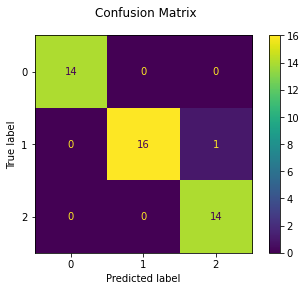

In [22]:
disp = metrics.plot_confusion_matrix(dtc, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [23]:
export_graphviz(dtc,out_file='iris_tree.dot',feature_names = list(main_data.feature_names),
               class_names=list(main_data.target_names), filled = True)

# Convert to png
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

0

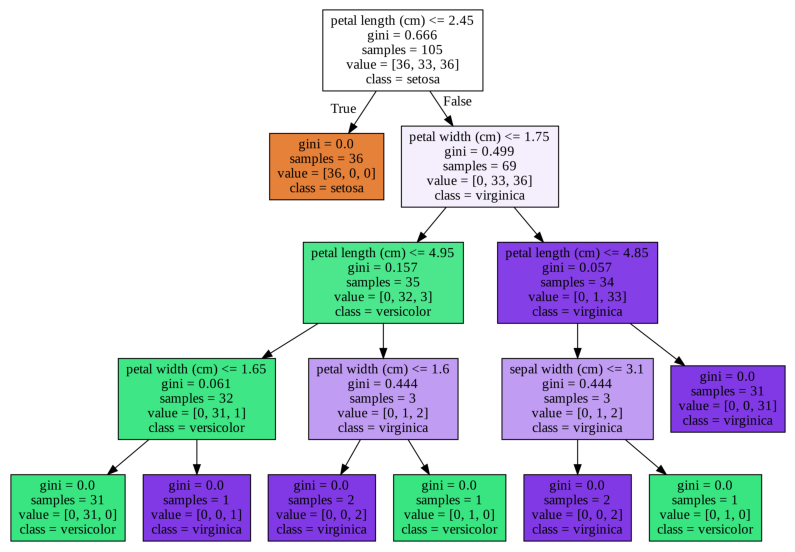

In [24]:
# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()